#Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Process mining course/final_project')

Mounted at /content/drive


#Import the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
df = pd.read_csv(r'creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,40049,-2.856643,-1.580895,1.183275,-1.862689,-2.579951,-1.043656,-1.007610,0.919906,-1.879716,...,-0.012102,-0.304192,-0.142939,0.659917,0.200746,-0.314130,0.273768,-0.199219,215.09,0
39995,40049,-1.051131,0.606656,0.441297,0.590587,-0.118730,1.010767,2.282192,-0.751310,0.141134,...,-0.168207,0.495169,-0.066540,-0.904026,-0.149187,-0.302797,-0.188726,-0.248812,280.18,0
39996,40049,1.188332,0.360587,-0.024267,1.179898,-0.095200,-0.975171,0.403633,-0.160097,-0.460291,...,0.063470,0.115945,-0.129453,0.527456,0.748484,-0.308659,-0.022350,0.003130,15.33,0
39997,40050,1.038810,-2.090833,0.852849,-0.847290,-2.112321,0.291188,-1.321491,0.007713,-0.771225,...,-0.059743,0.138289,-0.341212,-0.045303,0.516037,0.016258,0.051843,0.061811,236.19,0


# Data Preprocessing

In [4]:
# check for missing values
missing=df.isnull().sum()
print(missing)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
df = df.drop(['Time'], axis = 1) # drop time column

# split dependent variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# no categorical data so don't need to do any encoding

In [6]:
print(X)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.18833199e+00  3.60587271e-01 -2.42671732e-02 ... -2.23496673e-02
   3.12981134e-03  1.53300000e+01]
 [ 1.03880985e+00 -2.09083275e+00  8.52849036e-01 ...  5.18432099e-02
   6.18112614e-02  2.36190000e+02]
 [ 1.21102697e+00  6.14544124e-01 -4.59212064e-01 ... -1.39943023e-02
   4.26975689e-02  7.60000000e-01]]


In [7]:
print(y)

[0 0 0 ... 0 0 0]


In [8]:
# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [9]:
# feature scaling

# for any neural network model we must always apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
#df = df.drop(['Time'], axis=1)
# check that they have the same scale 

# imbalanced dataset try sampling with replacement


# Build ANN

In [10]:
# Initialize the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#TODO: change number of neurons and see how it effects outcome

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

# Adding the output layer, sigmoid allows the probab values if multi softmax
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # units is 1 because it is a binary prediction 

# Train the ANN

In [12]:
# Compile the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
# training the ANN
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1000/1000 [==============================] - 5s 4ms/step - loss: 0.1005 - accuracy: 0.9794
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 0.9983
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 8/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 0.9988
Epoch 9/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9988
Epoch 10/100
1000/1000 [==============================] - 3s 3ms/step - l

# Analysis

As we see, the accuracy is suspiciously high. Looking at the data we can conclude that this is because there is a disporoportionate ratio of fraud observations and therfore our data is imbalanced. There are a few different solutions for this. We can change the performance metric, change the algorithm, oversample the minority class, undersample the majoirty class, or generate synthetic sample. Because of the time crunch I will try the second option and change the algorithm. Since decision trees frequently perform well on imbalanced data I will run one

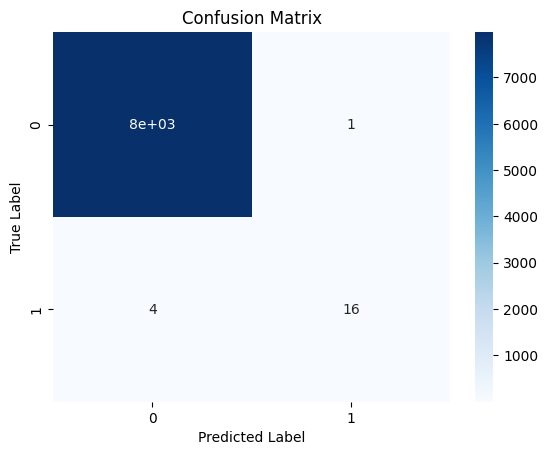

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Evaluation Metrics

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.999375
Precision: 0.9411764705882353
Recall: 0.8
F1-score: 0.8648648648648648
AUC-ROC: 0.899937343358396
